In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
import statsmodels.api as sm

%matplotlib inline

## Problem 1
Confirm your group for the second project component. Check in with me if the group is different from the
first project component.
Post a public note on Piazza in the project folder with the title “[group] all group members’ last names”.
Include in the body of the note all of the group members’ full names.

Group - Samdariya, Kasoju, Muralidhar, Kanuparti

Aanchal Anil Samdariya  
Apoorva Kasoju  
Karan Gulur Muralidhar  
Krishna Sai Rohith Kanuparti  

## Problem 2

Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (distribution of income across countries and continents over time). Include a link to the original. Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?

VISUALIZATION LINK - https://colab.research.google.com/github/prathwishshetty/DS5500-Homework-1/blob/master/ds5500_hw1.ipynb

GITHUB - https://github.com/prathwishshetty/DS5500-Homework-1

To compare across continents, a static plot has been incorporated which is similar to what i have done. However for the distribtuion of income across countries, a dynamic plot has been used compared to static plot of mine.

The dynamic plot with a world map incorporated is a visual treat to observe and it represents so much information effieciently. The timeline scale shows how the income changes over time. The only disadvantage of the dynamic plot is that if you want to check out the changes for a particular country over time and see if there was any dip or increase, a static might be a better choice.

## Problem 3

Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 3 (relationship between income, life expectancy, and child mortality over time). Include a link to the original. Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?

VISUALIZATION LINK - https://colab.research.google.com/github/prathwishshetty/DS5500-Homework-1/blob/master/ds5500_hw1.ipynb

GITHUB - https://github.com/prathwishshetty/DS5500-Homework-1

The static plot to depict relationship between income, life expectancy and child mortality is similar to what i have. The plot is substantiated with explanation of dips and outliers and potential reasons for it which is worth noting. However the solution is devoid of the explicit representation of relationship across all continents. 

## Problem 4

Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and life expectancy over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.) Visualize the model(s) and comment on what they tell you about the relationship between income and life expectancy over time.

In [244]:
def run_4_model_1(grouped_time_df):
    
    # Fit Linear Regression
    x = grouped_time_df[['life_expectancy']]
    grouped_time_df['gdp_per_capita'] = np.log(grouped_time_df['gdp_per_capita'])
    y = grouped_time_df[['gdp_per_capita']]
    
    regressor = LinearRegression().fit(x, y)
    y_pred = regressor.predict(x)
    
    model_result_df = pd.DataFrame({'x':x['life_expectancy'], 'y': y['gdp_per_capita'], 'y_pred': y_pred.flatten()})
    model_result_df['residual'] = model_result_df['y'] - model_result_df['y_pred']
    
    fig, ax = plt.subplots(ncols=1, figsize=(25,10))
    sns.scatterplot(x='x', y='y', data=model_result_df, ax=ax)
    sns.lineplot(x='x', y='y_pred', data=model_result_df, ax=ax)
    ax.title.set_text('log(y) ~ x')
    plt.show()
#     sns.scatterplot(x='y', y='residual', data=model_train_result_df, ax=ax[3, 0])
    r2_score_value = r2_score(model_result_df['y'], model_result_df['y_pred']) 
    
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2_value = 1 -  (((1-r2_score_value)*(n-1))/(n-p-1))
    print("Intercepts: {}, Coeeficient: {}, R2_Value: {}, Adjusted_R2: {}"
          .format(regressor.intercept_, regressor.coef_, r2_score_value, adjusted_r2_value)
         )
    

In [245]:
def run_4_model_2(grouped_time_df):
    
    # Fit Linear Regression
    x = grouped_time_df[['life_expectancy']]
    y = grouped_time_df[['gdp_per_capita']]
    
    # Scaling x
    x['life_expectancy'] = preprocessing.scale(x)
    x['life_expectancy_2'] =  x['life_expectancy'] ** 2
    
    y = np.log(y)
    
    regressor = LinearRegression().fit(x, y)
    y_pred = regressor.predict(x)
    
    model_result_df = pd.DataFrame({'x':x['life_expectancy'], 'y': y['gdp_per_capita'], 'y_pred': y_pred.flatten()})
    model_result_df['residual'] = model_result_df['y'] - model_result_df['y_pred']
    
    fig, ax = plt.subplots(ncols=1, figsize=(25,10))
    sns.scatterplot(x='x', y='y', data=model_result_df, ax=ax)
    sns.lineplot(x='x', y='y_pred', data=model_result_df, ax=ax)
    ax.title.set_text('log(y) ~ x + x**2')
    plt.show()
#     sns.scatterplot(x='y', y='residual', data=model_train_result_df, ax=ax[3, 0])
    
    r2_score_value = r2_score(model_result_df['y'], model_result_df['y_pred']) 
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2_value = 1 -  (((1-r2_score_value)*(n-1))/(n-p-1))
    print("Intercepts: {}, Coeeficient: {}, R2_Value: {}, Adjusted_R2: {}"
          .format(regressor.intercept_, regressor.coef_, r2_score_value, adjusted_r2_value)
         )

In [246]:
def run_4_model_3(grouped_time_df):
    
    # Fit Linear Regression
    x = grouped_time_df[['life_expectancy']]
    y = grouped_time_df[['gdp_per_capita']]
    
    # Scaling x
    x['life_expectancy'] = preprocessing.scale(x)
    x['life_expectancy_2'] =  x['life_expectancy'] ** 2
    x['life_expectancy_3'] =  x['life_expectancy'] ** 3    
    y = np.log(y)
    
    regressor = LinearRegression().fit(x, y)
    y_pred = regressor.predict(x)
    
    model_result_df = pd.DataFrame({'x':x['life_expectancy'], 'y': y['gdp_per_capita'], 'y_pred': y_pred.flatten()})
    model_result_df['residual'] = model_result_df['y'] - model_result_df['y_pred']
    
    fig, ax = plt.subplots(ncols=1, figsize=(25,10))
    sns.scatterplot(x='x', y='y', data=model_result_df, ax=ax)
    sns.lineplot(x='x', y='y_pred', data=model_result_df, ax=ax)
    ax.title.set_text('log(y) ~ x + x**2 + x**3')
    plt.show()
#     sns.scatterplot(x='y', y='residual', data=model_train_result_df, ax=ax[3, 0])
    
    r2_score_value = r2_score(model_result_df['y'], model_result_df['y_pred']) 
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2_value = 1 -  (((1-r2_score_value)*(n-1))/(n-p-1))
    print("Intercepts: {}, Coeeficient: {}, R2_Value: {}, Adjusted_R2: {}"
          .format(regressor.intercept_, regressor.coef_, r2_score_value, adjusted_r2_value)
         )

In [247]:
def run_4_model_4(grouped_time_df):
    
    # Fit Linear Regression
    x = grouped_time_df[['life_expectancy']]
    y = grouped_time_df[['gdp_per_capita']]
    
    # Scaling x
    x['life_expectancy'] = preprocessing.scale(x)
    x['life_expectancy_2'] =  x['life_expectancy'] ** 2
    x['life_expectancy_3'] =  x['life_expectancy'] ** 3
    x['life_expectancy_4'] =  x['life_expectancy'] ** 4
    
    y = np.log(y)
    
    regressor = LinearRegression().fit(x, y)
    y_pred = regressor.predict(x)
    
    model_result_df = pd.DataFrame({'x':x['life_expectancy'], 'y': y['gdp_per_capita'], 'y_pred': y_pred.flatten()})
    model_result_df['residual'] = model_result_df['y'] - model_result_df['y_pred']
    
    fig, ax = plt.subplots(ncols=1, figsize=(25,10))
    sns.scatterplot(x='x', y='y', data=model_result_df, ax=ax)
    sns.lineplot(x='x', y='y_pred', data=model_result_df, ax=ax)
    ax.title.set_text('log(y) ~ x + x**2 + x**3 + x**4')
    plt.show()
#     sns.scatterplot(x='y', y='residual', data=model_train_result_df, ax=ax[3, 0])
    
    r2_score_value = r2_score(model_result_df['y'], model_result_df['y_pred']) 
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2_value = 1 -  (((1-r2_score_value)*(n-1))/(n-p-1))
    print("Intercepts: {}, Coeeficient: {}, R2_Value: {}, Adjusted_R2: {}"
          .format(regressor.intercept_, regressor.coef_, r2_score_value, adjusted_r2_value)
         )

In [250]:
def run_4():
    country_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')
    gdp_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
    life_expectancy_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
    result_df = pd.merge(gdp_df, country_df[['country', 'income_groups', 'world_4region']], left_on = 'geo', right_on='country')
    result_df = pd.merge(result_df, life_expectancy_df, on = ['geo', 'time'])
    result_df.rename(columns={'life_expectancy_years':'life_expectancy',
                              'income_per_person_gdppercapita_ppp_inflation_adjusted':'gdp_per_capita'}, 
                     inplace=True)
    
    grouped_time_df = result_df[['time', 'life_expectancy', 'gdp_per_capita']].groupby(['time']).mean().reset_index()
    grouped_time_df.sort_values(by=['time'], inplace=True)
    
    # Visualize
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
    sns.scatterplot(x='life_expectancy', y='gdp_per_capita', data=result_df, ax=ax[0, 0])
    ax[0, 0].title.set_text('Actual')
    sns.scatterplot(x='life_expectancy', y='gdp_per_capita', data=result_df, ax=ax[0, 1])
    ax[0, 1].set(yscale="log")
    ax[0, 1].title.set_text('Transformed y-axis')
    
    sns.scatterplot(x='life_expectancy', y='gdp_per_capita', data=grouped_time_df, ax=ax[1, 0])
    ax[1, 0].title.set_text('Averaged Actual')
    sns.scatterplot(x='life_expectancy', y='gdp_per_capita', data=grouped_time_df, ax=ax[1, 1])
    ax[1, 1].title.set_text('Avertaged transformed y-axis')
    ax[1, 1].set(yscale="log")
    
    plt.show()
    
    # Removing the outlier
    grouped_time_df = grouped_time_df[grouped_time_df['life_expectancy'] > 30]
    
    run_4_model_1(grouped_time_df)
    run_4_model_2(grouped_time_df)
    run_4_model_3(grouped_time_df)
    run_4_model_4(grouped_time_df)
        

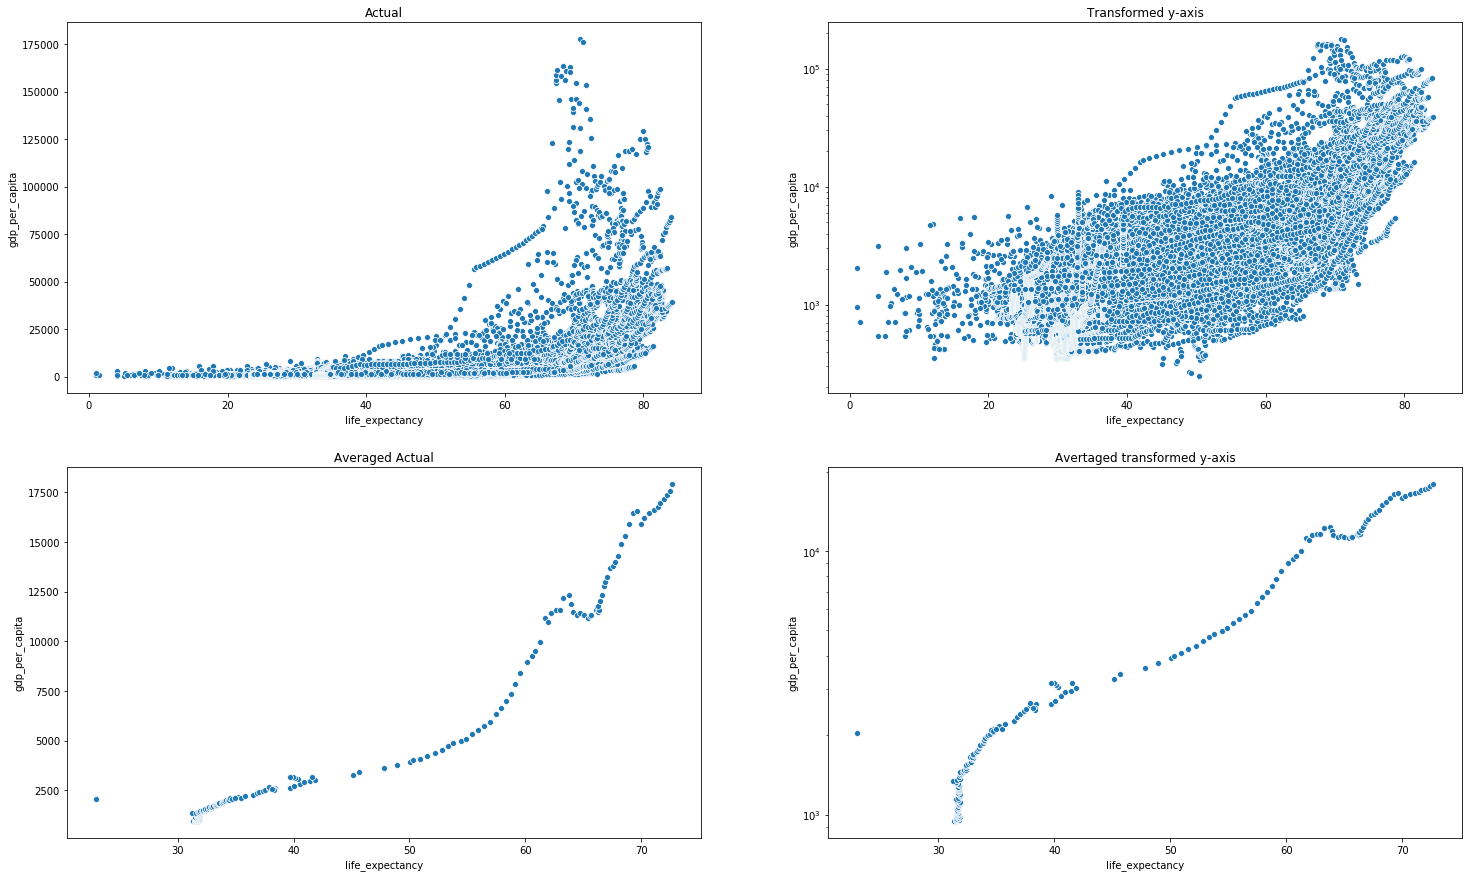

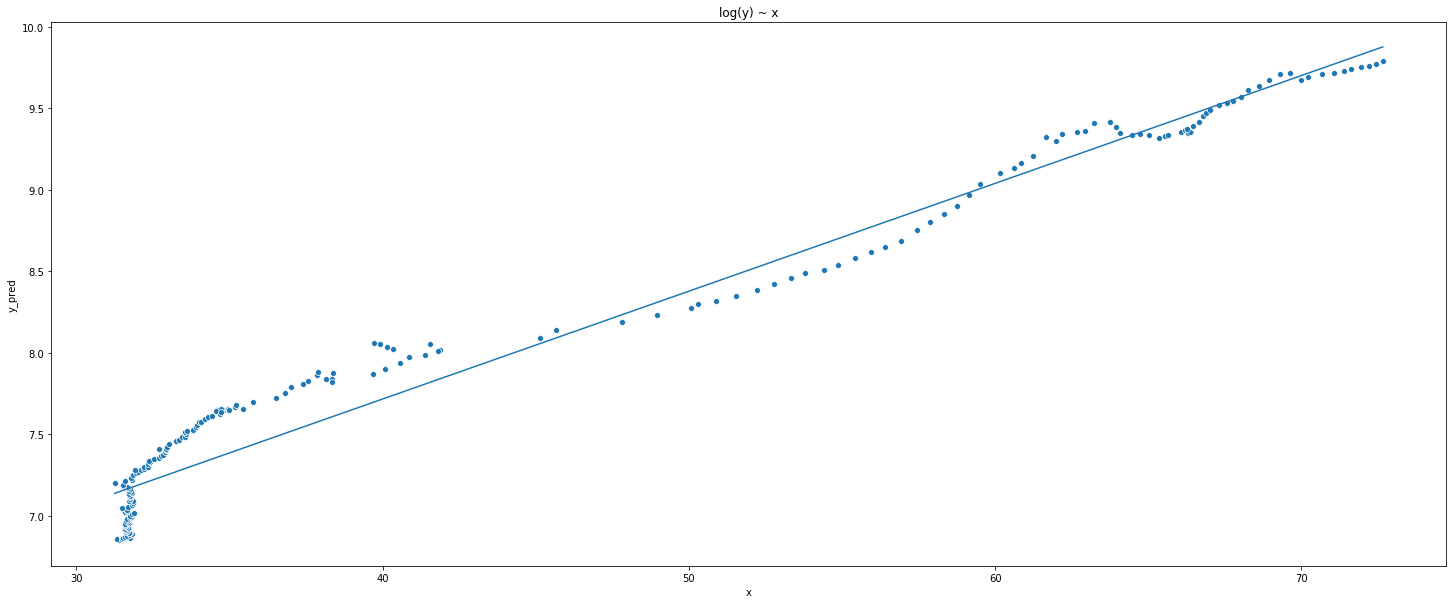

Intercepts: [5.07113588], Coeeficient: [[0.06614691]], R2_Value: 0.9634164749136694, Adjusted_R2: 0.9632471067419734


/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


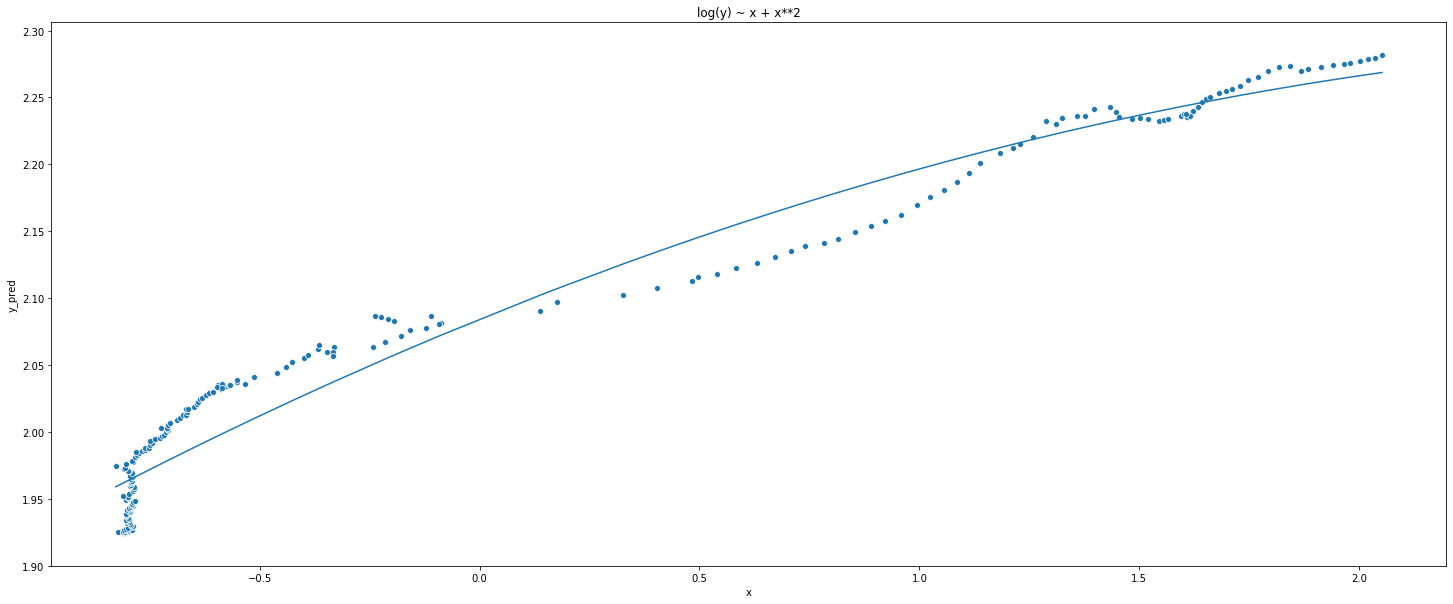

Intercepts: [2.08418771], Coeeficient: [[ 0.13371236 -0.02135302]], R2_Value: 0.9598098930535174, Adjusted_R2: 0.9594360315935501


/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


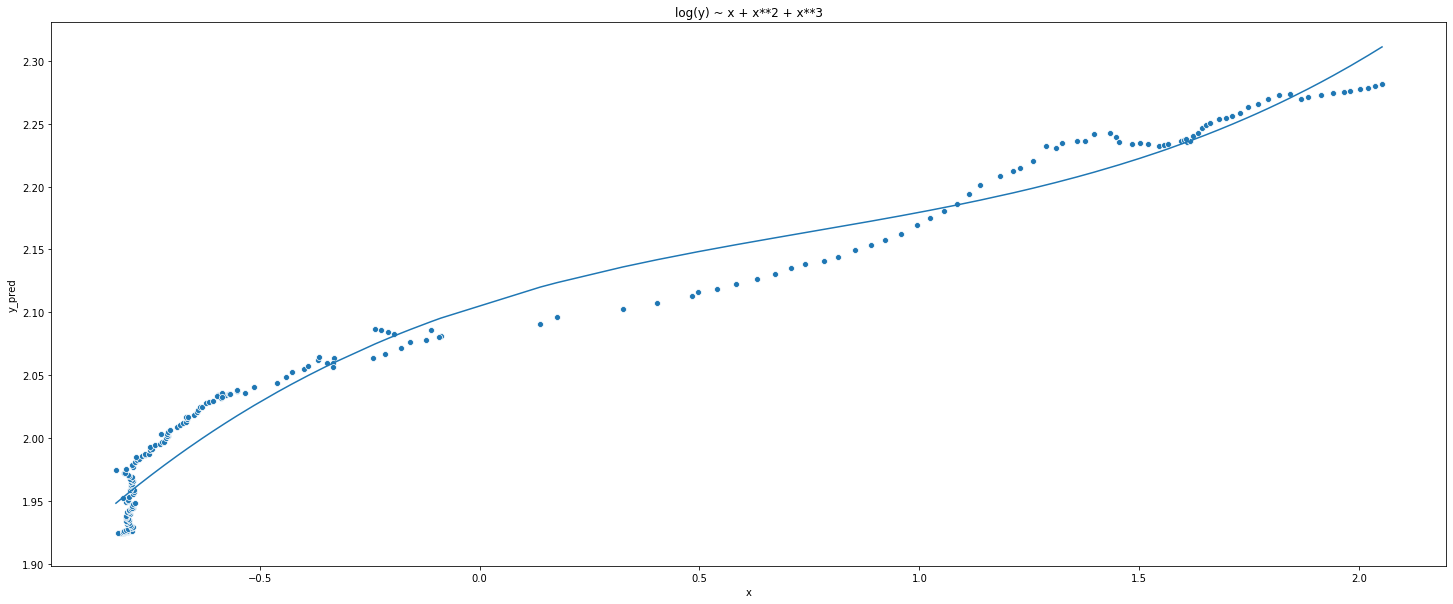

Intercepts: [2.1059153], Coeeficient: [[ 0.11195083 -0.06924996  0.03087456]], R2_Value: 0.9724064413831788, Adjusted_R2: 0.9720196157950924


/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


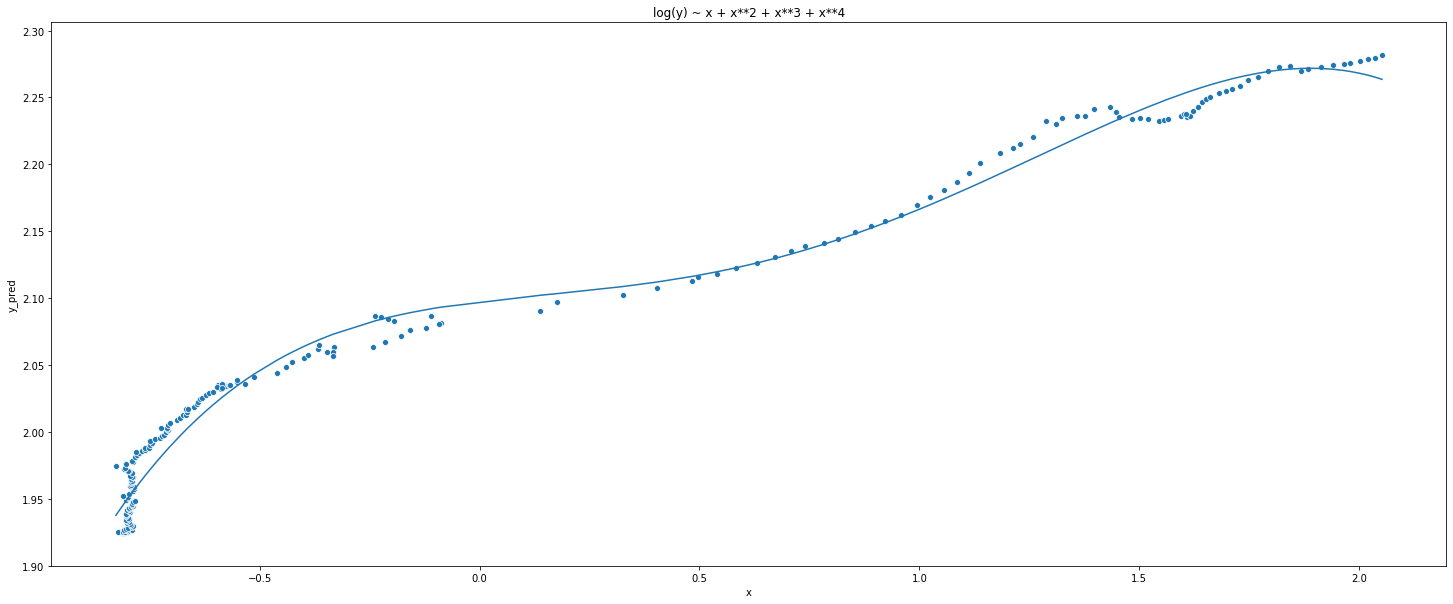

Intercepts: [2.09726371], Coeeficient: [[ 0.04011532 -0.05184942  0.12454132 -0.04363948]], R2_Value: 0.985672976517881, Adjusted_R2: 0.9854039244337097


In [251]:
run_4()

## Problem 5

Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and child mortality over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.) Visualize the model(s) and comment on what they tell you about the relationship between income and child mortality over time.

In [252]:
def run_5_model_1(grouped_time_df):
    
    # Fit Linear Regression
    x = grouped_time_df[['child_mortality']]
    grouped_time_df['gdp_per_capita'] = np.log(grouped_time_df['gdp_per_capita'])
    y = grouped_time_df[['gdp_per_capita']]
    
    regressor = LinearRegression().fit(x, y)
    y_pred = regressor.predict(x)
    
    model_result_df = pd.DataFrame({'x':x['child_mortality'], 'y': y['gdp_per_capita'], 'y_pred': y_pred.flatten()})
    model_result_df['residual'] = model_result_df['y'] - model_result_df['y_pred']
    
    fig, ax = plt.subplots(ncols=1, figsize=(25,10))
    sns.scatterplot(x='x', y='y', data=model_result_df, ax=ax)
    sns.lineplot(x='x', y='y_pred', data=model_result_df, ax=ax)
    ax.title.set_text('log(y) ~ x')
    plt.show()
#     sns.scatterplot(x='y', y='residual', data=model_train_result_df, ax=ax[3, 0])
    r2_score_value = r2_score(model_result_df['y'], model_result_df['y_pred']) 
    
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2_value = 1 -  (((1-r2_score_value)*(n-1))/(n-p-1))
    print("Intercepts: {}, Coeeficient: {}, R2_Value: {}, Adjusted_R2: {}"
          .format(regressor.intercept_, regressor.coef_, r2_score_value, adjusted_r2_value)
         )

In [255]:
def run_5_model_2(grouped_time_df):
    
    # Fit Linear Regression
    x = grouped_time_df[['child_mortality']]
    y = grouped_time_df[['gdp_per_capita']]
    
    # Scaling x
    x['child_mortality'] = preprocessing.scale(x)
    x['child_mortality_2'] =  x['child_mortality'] ** 2
    
    y = np.log(y)
    
    regressor = LinearRegression().fit(x, y)
    y_pred = regressor.predict(x)
    
    model_result_df = pd.DataFrame({'x':x['child_mortality'], 'y': y['gdp_per_capita'], 'y_pred': y_pred.flatten()})
    model_result_df['residual'] = model_result_df['y'] - model_result_df['y_pred']
    
    fig, ax = plt.subplots(ncols=1, figsize=(25,10))
    sns.scatterplot(x='x', y='y', data=model_result_df, ax=ax)
    sns.lineplot(x='x', y='y_pred', data=model_result_df, ax=ax)
    ax.title.set_text('log(y) ~ x + x**2')
    plt.show()
#     sns.scatterplot(x='y', y='residual', data=model_train_result_df, ax=ax[3, 0])
    
    r2_score_value = r2_score(model_result_df['y'], model_result_df['y_pred']) 
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2_value = 1 -  (((1-r2_score_value)*(n-1))/(n-p-1))
    print("Intercepts: {}, Coeeficient: {}, R2_Value: {}, Adjusted_R2: {}"
          .format(regressor.intercept_, regressor.coef_, r2_score_value, adjusted_r2_value)
         )

In [260]:
def run_5_model_3(grouped_time_df):
    
    # Fit Linear Regression
    x = grouped_time_df[['child_mortality']]
    y = grouped_time_df[['gdp_per_capita']]
    
    # Scaling x
    x['life_expectancy'] = preprocessing.scale(x)
    x['child_mortality_2'] =  x['child_mortality'] ** 2
    x['child_mortality_3'] =  x['child_mortality'] ** 3    
    y = np.log(y)
    
    regressor = LinearRegression().fit(x, y)
    y_pred = regressor.predict(x)
    
    model_result_df = pd.DataFrame({'x':x['child_mortality'], 'y': y['gdp_per_capita'], 'y_pred': y_pred.flatten()})
    model_result_df['residual'] = model_result_df['y'] - model_result_df['y_pred']
    
    fig, ax = plt.subplots(ncols=1, figsize=(25,10))
    sns.scatterplot(x='x', y='y', data=model_result_df, ax=ax)
    sns.lineplot(x='x', y='y_pred', data=model_result_df, ax=ax)
    ax.title.set_text('log(y) ~ x + x**2 + x**3')
    plt.show()
#     sns.scatterplot(x='y', y='residual', data=model_train_result_df, ax=ax[3, 0])
    
    r2_score_value = r2_score(model_result_df['y'], model_result_df['y_pred']) 
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2_value = 1 -  (((1-r2_score_value)*(n-1))/(n-p-1))
    print("Intercepts: {}, Coeeficient: {}, R2_Value: {}, Adjusted_R2: {}"
          .format(regressor.intercept_, regressor.coef_, r2_score_value, adjusted_r2_value)
         )

In [267]:
def run_5_model_4(grouped_time_df):
    
    # Fit Linear Regression
    x = grouped_time_df[['child_mortality']]
    y = grouped_time_df[['gdp_per_capita']]
    
    # Scaling x
    x['life_expectancy'] = preprocessing.scale(x)
    x['child_mortality_2'] =  x['child_mortality'] ** 2
    x['child_mortality_3'] =  x['child_mortality'] ** 3
    x['child_mortality_4'] =  x['child_mortality'] ** 4
    
    y = np.log(y)
    
    regressor = LinearRegression().fit(x, y)
    y_pred = regressor.predict(x)
    
    model_result_df = pd.DataFrame({'x':x['life_expectancy'], 'y': y['gdp_per_capita'], 'y_pred': y_pred.flatten()})
    model_result_df['residual'] = model_result_df['y'] - model_result_df['y_pred']
    
    fig, ax = plt.subplots(ncols=1, figsize=(25,10))
    sns.scatterplot(x='x', y='y', data=model_result_df, ax=ax)
    sns.lineplot(x='x', y='y_pred', data=model_result_df, ax=ax)
    ax.title.set_text('log(y) ~ x + x**2 + x**3 + x**4')
    plt.show()
#     sns.scatterplot(x='y', y='residual', data=model_train_result_df, ax=ax[3, 0])
    
    r2_score_value = r2_score(model_result_df['y'], model_result_df['y_pred']) 
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2_value = 1 -  ( ((1-r2_score_value)*(n-1)) / (n-p-1) )
    print("Intercepts: {}, Coeeficient: {}, R2_Value: {}, Adjusted_R2: {}"
          .format(regressor.intercept_, regressor.coef_, r2_score_value, adjusted_r2_value)
         )

In [268]:
def run_5():
    country_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')
    gdp_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
    child_mortality_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
    
    result_df = pd.merge(gdp_df, country_df[['country', 'income_groups', 'world_4region']], left_on = 'geo', right_on='country')
    result_df = pd.merge(result_df, child_mortality_df, on = ['geo', 'time'])
    result_df.rename(columns={'child_mortality_0_5_year_olds_dying_per_1000_born':'child_mortality',
                              'income_per_person_gdppercapita_ppp_inflation_adjusted':'gdp_per_capita'}, 
                     inplace=True)
    
    grouped_time_df = result_df[['time', 'child_mortality', 'gdp_per_capita']].groupby(['time']).mean().reset_index()
    grouped_time_df.sort_values(by=['time'], inplace=True)
    
    # Visualize
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
    sns.scatterplot(x='child_mortality', y='gdp_per_capita', data=result_df, ax=ax[0, 0])
    ax[0, 0].title.set_text('Actual')
    sns.scatterplot(x='child_mortality', y='gdp_per_capita', data=result_df, ax=ax[0, 1])
    ax[0, 1].set(yscale="log")
    ax[0, 1].title.set_text('Transformed y-axis')
    
    sns.scatterplot(x='child_mortality', y='gdp_per_capita', data=grouped_time_df, ax=ax[1, 0])
    ax[1, 0].title.set_text('Averaged Actual')
    sns.scatterplot(x='child_mortality', y='gdp_per_capita', data=grouped_time_df, ax=ax[1, 1])
    ax[1, 1].title.set_text('Avertaged transformed y-axis')
    ax[1, 1].set(yscale="log")
    
    plt.show()
    
    run_5_model_1(grouped_time_df)
    run_5_model_2(grouped_time_df)
    run_5_model_3(grouped_time_df)
    run_5_model_4(grouped_time_df)
        

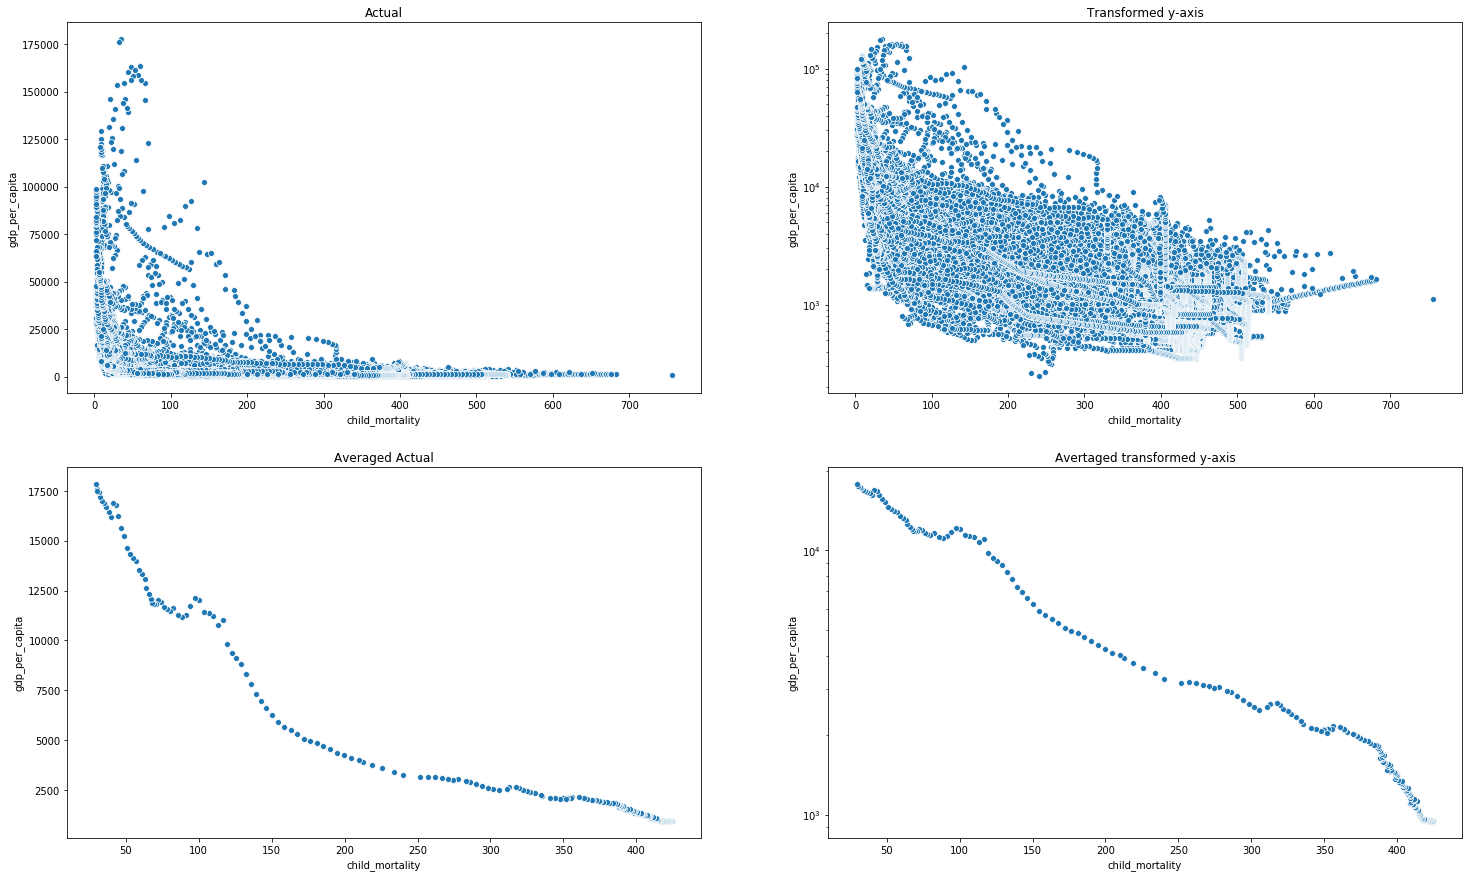

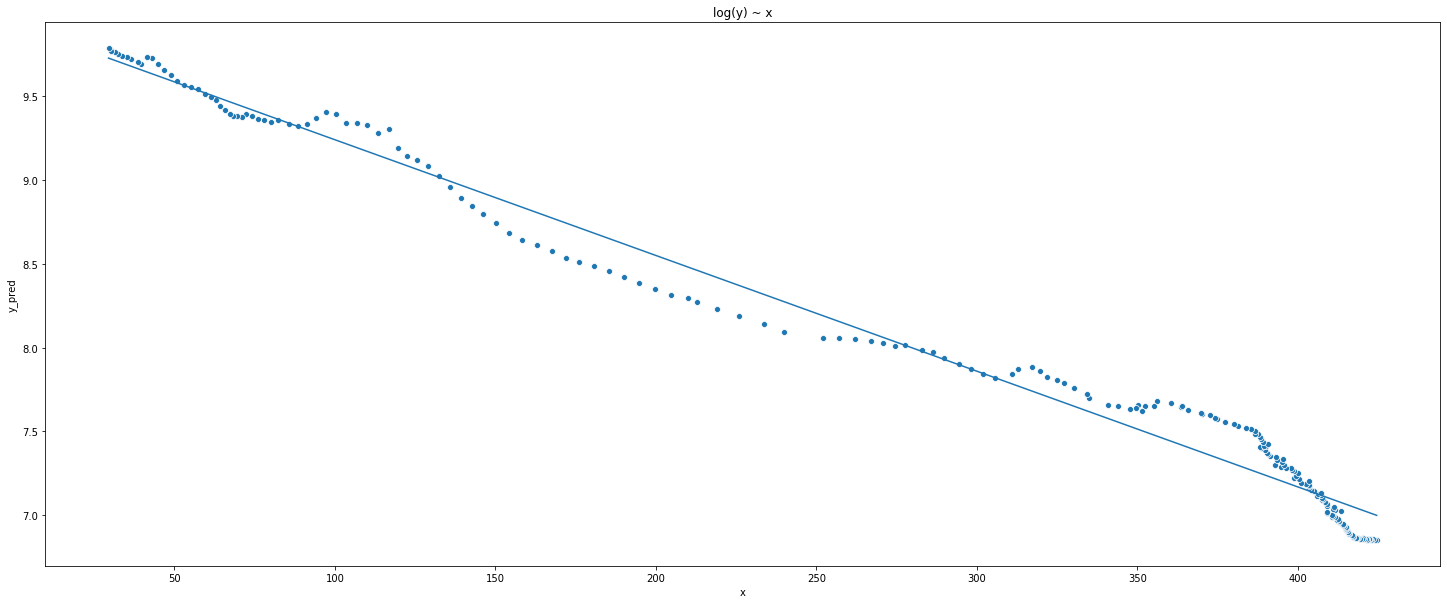

Intercepts: [9.93205096], Coeeficient: [[-0.00690866]], R2_Value: 0.9815783321601401, Adjusted_R2: 0.9814934396816154


/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


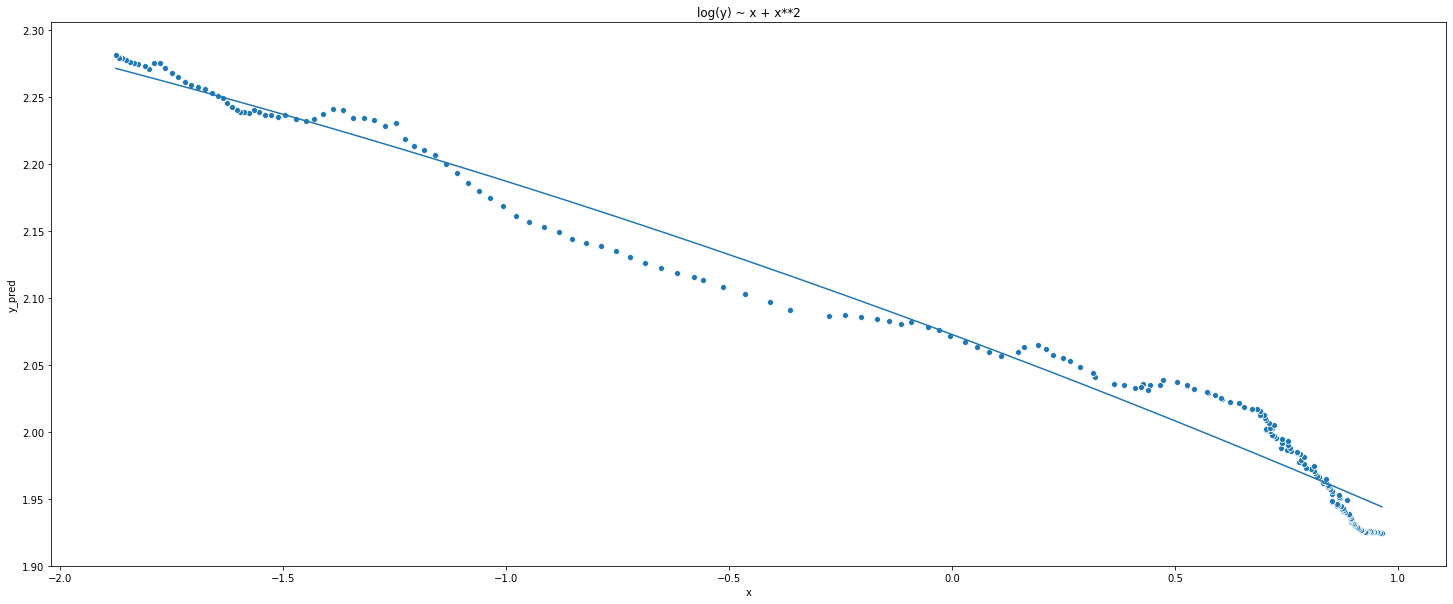

Intercepts: [2.07255953], Coeeficient: [[-0.12413585 -0.00969446]], R2_Value: 0.9783653772267896, Adjusted_R2: 0.9781650566455562


/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


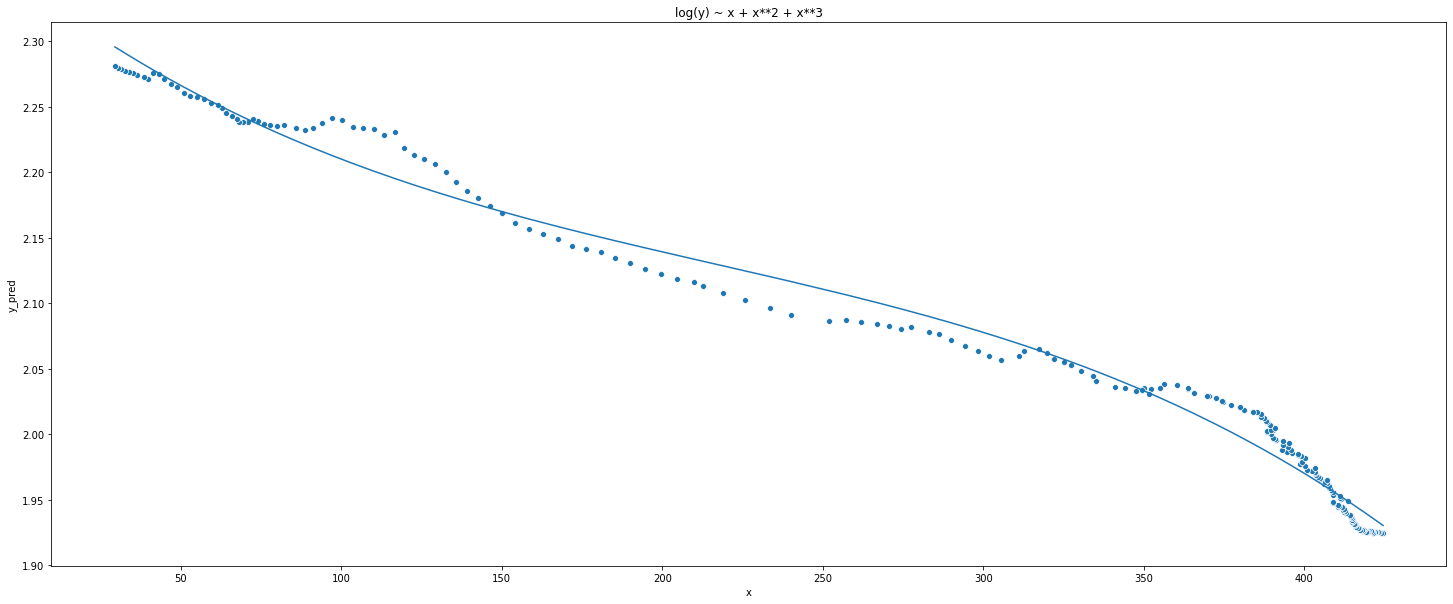

Intercepts: [2.34573068], Coeeficient: [[-1.86613625e-03 -1.34105768e-05  6.01777160e-06 -9.24922896e-09]], R2_Value: 0.9868216032496775, Adjusted_R2: 0.9865752780767743


/Users/karangm/PycharmProjects/ds5500-hw2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


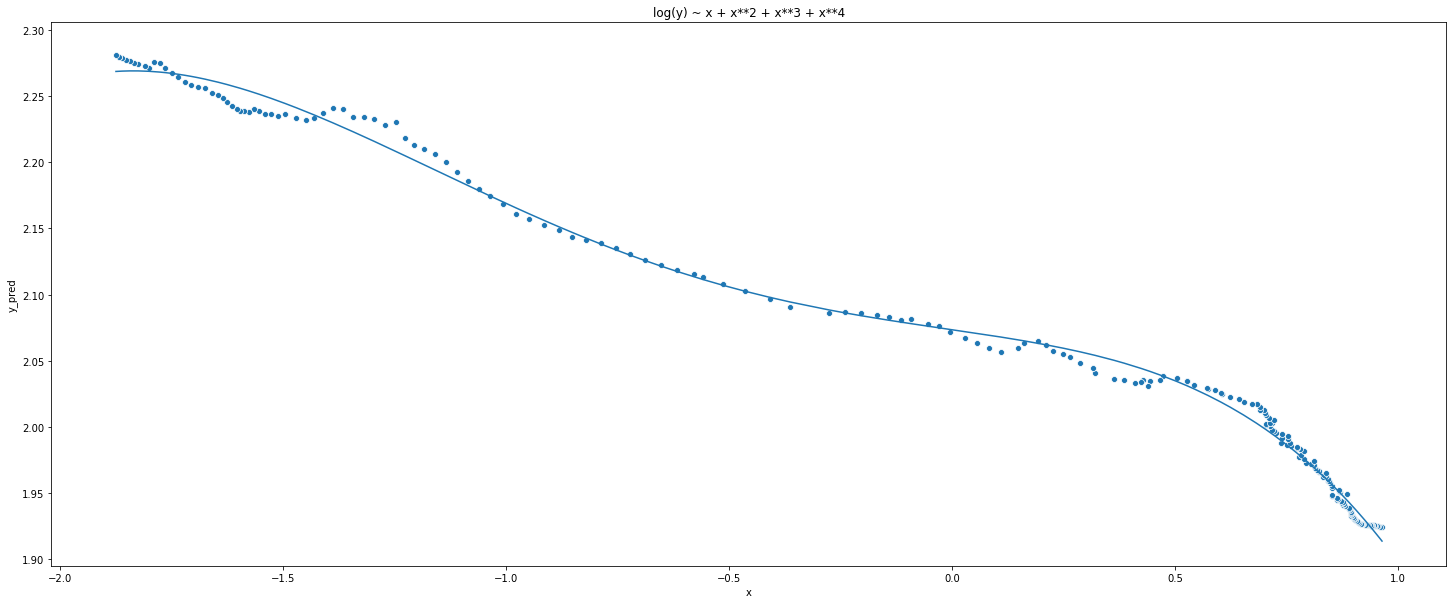

Intercepts: [2.2490766], Coeeficient: [[ 1.24549333e-03  8.95045409e-06 -2.18751047e-05  8.18628226e-08
  -9.80606967e-11]], R2_Value: 0.9960439061465581, Adjusted_R2: 0.9959510400936604


In [269]:
run_5()